1. Importacion de los paquetes necesarios:

In [1]:
import matplotlib.pyplot as plt

from keras.datasets import cifar10

from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten

from keras.constraints import maxnorm

from keras.optimizers import SGD

from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.utils import np_utils

Using TensorFlow backend.


2. Cargar el conjunto de datos CIFAR-10 usando la función de ayuda de Keras

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

3. Normalizacion: Píxeles en rango 0-255 para canales rojo, verde y azul. Como los valores de entrada son conocidos podemos normalizar a rango 0-1 dividiendo cada valor por observación máxima (255). Para dividir cambiamos datos enteros a flotantes.

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

4. Codificacion de la salida: Variables de salida se denotan como vector de números enteros 0-1. Transformamos en matriz binaria para modelar mejor el problema de la clasificación.

In [4]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

5. Creacion y compilacion del modelo CNN

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

epochs = 20
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)       

6. Ajustar modelo: 20 epocas y tamaño de lote 64. Numero pequeño de epocas para hacerlo mas rapido.

In [6]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 148s 3ms/step - loss: 1.9408 - accuracy: 0.2785 - val_loss: 1.7390 - val_accuracy: 0.3896
Epoch 2/20
50000/50000 [==============================] - 147s 3ms/step - loss: 1.5001 - accuracy: 0.4510 - val_loss: 1.3903 - val_accuracy: 0.5034
Epoch 3/20
50000/50000 [==============================] - 145s 3ms/step - loss: 1.3129 - accuracy: 0.5239 - val_loss: 1.2479 - val_accuracy: 0.5502
Epoch 4/20
50000/50000 [==============================] - 146s 3ms/step - loss: 1.1807 - accuracy: 0.5753 - val_loss: 1.1427 - val_accuracy: 0.5870
Epoch 5/20
50000/50000 [==============================] - 147s 3ms/step - loss: 1.0796 - accuracy: 0.6138 - val_loss: 1.0463 - val_accuracy: 0.6277
Epoch 6/20
50000/50000 [==============================] - 155s 3ms/step - loss: 0.9851 - accuracy: 0.6496 - val_loss: 0.9604 - val_accuracy: 0.6604
Epoch 7/20
50000/50000 [==============================] - 162s

7. Prediccion

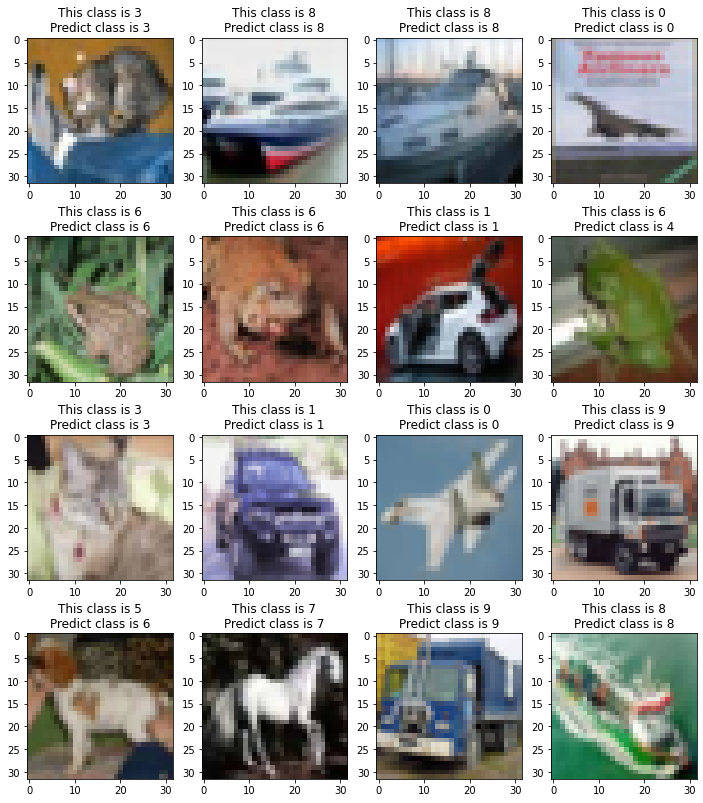

In [7]:
y_pred = model.predict(X_test)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test[i], cmap='binary')
    ax.set(title = f"This class is {y_test[i].argmax()}\nPredict class is {y_pred[i].argmax()}");

Classes - 0:airplane - 1:automobile - 2:bird - 3:cat - 4:deer - 5:dog - 6:frog - 7:horse - 8:ship - 9:truck

In [8]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 78.30%
